<a href="https://colab.research.google.com/github/ThomIves/BasicLinearAlgebraToolsPurePy/blob/master/Calculating_Probabilities_using_Normal_Distributions_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code Block 2.1**

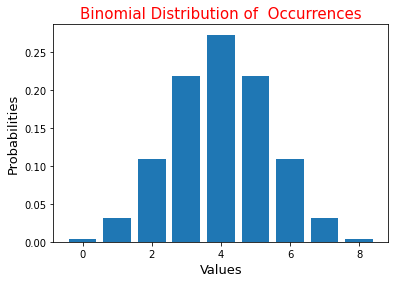

In [13]:
import scipy
from scipy.stats import binom 
import matplotlib.pyplot as plt 

# setting the values of n and p
n = 8
p = 0.5    
# Here p = 0.5 as it is a binomial distribution with two outcomes
# (equal chances of success and failure)

# defining list of r values 
r_values = list(range(n + 1)) 

# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 

# plotting the graph  
plt.title(label="Binomial Distribution of  Occurrences", 
          fontsize=15, color="red")
plt.bar(r_values, dist)
plt.xlabel("Values",fontsize=13)
plt.ylabel("Probabilities",fontsize=13)
plt.show()

**Code Block 3.1**

In [3]:
import math

''' Probability Density Function (PDF) from Scratch '''
def PDF(x, mean, std_dev):
    # first part of equation
    probability = 1.0 / math.sqrt(2 * 3.141592*(std_dev)**2)
    # multiply first part to second part
    probability *= math.exp(-0.5 * ((x - mean)/std_dev)**2)


    return probability

X = []

''' Create Fake Normally Distributed Data with Mean of 37, and Std_Dev of 2 '''
for x in range(29, 46):
    y = PDF(x, 37, 2)
    
    ''' Create fake data by replicating x according to it's probability '''
    N_vals_at_y = int(round(y * 1001, 0))
    for i in range(N_vals_at_y):
      X.append(x)


# Finding mean
mean = round(sum(X)/len(X), 4)


# Finding Standard Deviation
std_dev = 0.0
N = len(X)
for x in X:
  std_dev += (x - mean)**2

std_dev /= N
std_dev = math.sqrt(std_dev)
std_dev = round(std_dev, 2)

print(f'We fake measured the heights of {N} 1st graders.')
print(f'The mean is {mean}')
print(f'The standard deviation is {std_dev}')

We fake measured the heights of 1000 1st graders.
The mean is 37.0
The standard deviation is 1.99


**Code Block 3.2**

In [4]:
x = 39
print(PDF(x, 37, 2))

0.12098537484471858


**Code Block 3.3**

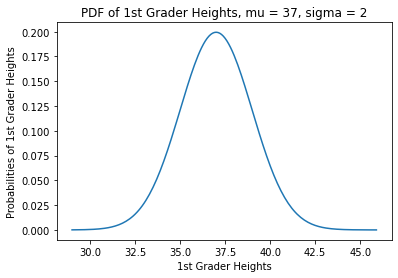

In [5]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

figure,ax = plt.subplots()
 
X = []
Y = []
 
for x in np.arange(29, 46, 0.1):
    X.append(x)
    y = norm.pdf(x=x, loc=37.0, scale=2)
    Y.append(y)

ax.set_xlabel('1st Grader Heights')
ax.set_ylabel('Probabilities of 1st Grader Heights')
ax.set_title('PDF of 1st Grader Heights, mu = 37, sigma = 2')
plt.plot(X, Y)
plt.show()

**Code Block 3.4**

In [6]:
x = 39
p = norm.pdf(x=x, loc=37.0, scale=2)
print(f'The probability of a 1st grader being "{x}" is {p}.')

The probability of a 1st grader being "39" is 0.12098536225957168.


**Code Block 3.5**

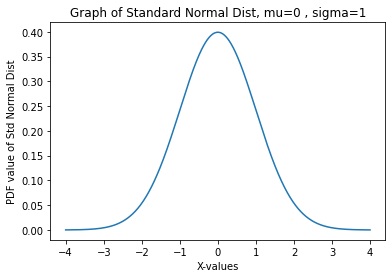

In [14]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

X = np.arange(-4, 4, 0.001)  # X is an array of x's
Y = norm.pdf(X, loc=0, scale=1)  # Y is an array of probabilities

plt.title('Graph of Standard Normal Dist, mu=0 , sigma=1')
plt.xlabel('X-values')
plt.ylabel('PDF value of Std Normal Dist')
plt.plot(X, Y)
plt.show()

**Code Block 3.6**

In [15]:
""" CDF of Normal Distribution without Numpy or Scipy """
import numpy as np  # only to get value of pi

'''Cumulative Distribution Function (CDF)'''
def CDF(mean=0, std_dev=1, x_left=-4, x_right=4, width=0.0001):
    CDF = 0

    ''' Call PDF for each value of x_left to x_right '''
    # calculate number of panels (+ 1 includes x_right)
    the_range = int((x_right - x_left) / width) + 1
    for i in range(the_range):
        x = x_left + i * width  # current x value
        y = PDF(x, mean, std_dev)  # probability of this panel
        panel = y * width  # this panel area under PDF curve
        CDF += panel  # sum panel areas = CDF
      
    return CDF

**Code Block 3.7**

In [16]:
text_1st = '1st Graders heights'
text_iqs = 'IQ scores'
values = [
    (text_iqs, 100, 15, 40, 160),
    (text_iqs, 100, 15, 40, 100),
    (text_iqs, 100, 15, 100, 160),
    (text_1st, 37, 2, 29, 45),
    (text_1st, 37, 2, 29, 37),
    (text_1st, 37, 2, 37, 45)]

for t in values:
    text = t[0]
    mean = t[1]
    std = t[2]
    lt = t[3]
    rt = t[4]
    cd_out = round(CDF(mean=mean, std_dev=std, 
                       x_left=lt, x_right=rt), 2)
    print(f'Probability of {text} being {lt} ≤ x ≤ {rt} is {cd_out}')

Probability of IQ scores being 40 ≤ x ≤ 160 is 1.0
Probability of IQ scores being 40 ≤ x ≤ 100 is 0.5
Probability of IQ scores being 100 ≤ x ≤ 160 is 0.5
Probability of 1st Graders heights being 29 ≤ x ≤ 45 is 1.0
Probability of 1st Graders heights being 29 ≤ x ≤ 37 is 0.5
Probability of 1st Graders heights being 37 ≤ x ≤ 45 is 0.5


**Code Block 3.8**

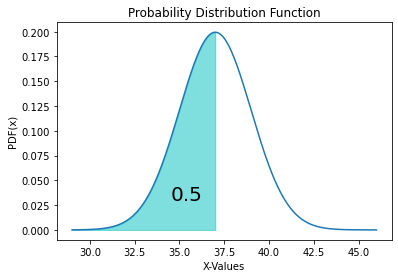

In [17]:
import scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

X = np.arange(29, 46, 0.0001)
Y = norm.pdf(X, loc=37, scale=2)
plt.plot(X, Y)
plt.title("Probability Distribution Function")
plt.xlabel('X-Values')
plt.ylabel('PDF(x)')

# for fill_between
pX = np.arange(29, 37, 0.0001)  # X values for fill
pY = norm.pdf(pX,loc=37, scale=2)  # Y values for fill
plt.fill_between(pX, pY, alpha=0.5, color='c')  # Fill method call

# for text
prob = round(norm.cdf(x=37, loc=37, scale=2),2)
plt.text(34.5, 0.03, prob, fontsize=20)  # Add text at position
plt.show()

**Code Block 4.1 To find P(X < x)**

In [18]:
from scipy.stats import norm

less_than_5=norm.cdf(x=5, loc=3, scale=2)
print(less_than_5)

0.8413447460685429


**Code Block 4.2**

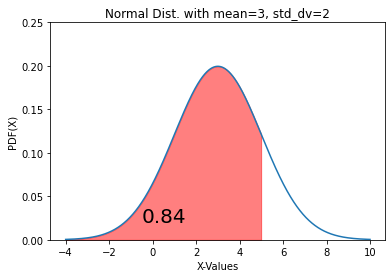

In [6]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=3, scale=2))
ax.set_title("Normal Dist. with mean=3, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

# for fill_between
px=np.arange(-4,5, 0.01)
ax.set_ylim(0, 0.25)
ax.fill_between(px, norm.pdf(px, loc=3, scale=2), alpha=0.5, color='r')

# for text
ax.text(-0.5,0.02,round(lessthan5,2), fontsize=20)
plt.show()

**Code Block 4.3 To find P (x1 < X < x2)**

In [7]:
norm(1, 2).cdf(5) - norm(1,2).cdf(0.2)

0.632671609662145

**Code Block 4.4**

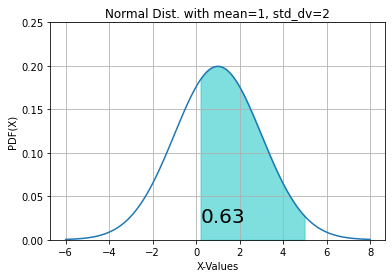

In [ ]:
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("Normal Dist. with mean=1, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)

px=np.arange(0.2,5,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='c')

pro=norm(1,2).cdf(5) - norm(1,2).cdf(0.2)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

**Code Block 4.5 To find P(X > x)**

In [11]:
greater_than_3 = norm.sf(x=3, loc=4, scale=2)
greater_than_3

0.6914624612740131

**Code Block 4.6**

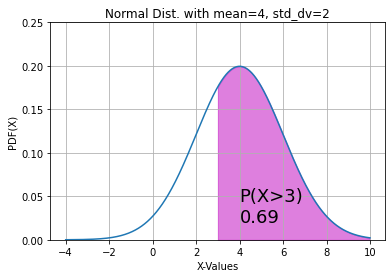

In [12]:
fig, ax = plt.subplots()
x= np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=4, scale=2))
ax.set_title("Normal Dist. with mean=4, std_dv=2")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
ax.grid(True)

px=np.arange(3, 10, 0.01)
ax.set_ylim(0, 0.25)
ax.fill_between(px,norm.pdf(px, loc=4, scale=2), alpha=0.5, color='m')

ax.text(4, 0.02, "P(X>3)\n%.2f" %(greater_than_3), fontsize=18)
plt.show()

**Code Block 4.7**

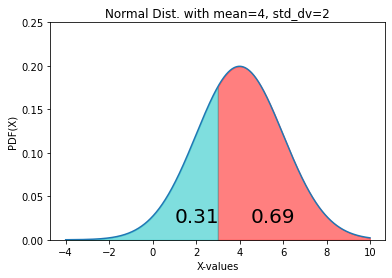

In [8]:
gr4 = norm.cdf(x=3, loc=4, scale=2)
gr14 = 1-gr4
fig, ax = plt.subplots()
x= np.arange(-4, 10, 0.001)
ax.plot(x, norm.pdf(x, loc=4, scale=2))
ax.set_title("Normal Dist. with mean=4, std_dv=2")
ax.set_xlabel('X-values')
ax.set_ylabel('PDF(X)')


px=np.arange(3, 10, 0.01)
ax.set_ylim(0, 0.25)
ax.fill_between(px,norm.pdf(px, loc=4, scale=2), 
                alpha=0.5, color='r')
px1=np.arange(-4, 3, 0.01)
ax.fill_between(px1,norm.pdf(px1, loc=4, scale=2),
                alpha=0.5, color='c')
ax.text(4.5, 0.02, round(gr14, 2), fontsize=20)
ax.text(1, 0.02, round(gr4, 2), fontsize=20)
plt.show()